In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
bound_map = {
    "PbO2": [
        [10, 50, 20],
         [20, 255, 205]
    ],
    "PEDOT": [
        [90, 50, 20],
         [120, 255, 205]
    ],
    "PbI2": [
        [20, 50, 20],
         [35, 255, 205]
    ],
}

In [6]:
FILEPATH = 'imgs/2V XM/300M.jpg'
TYPE_STRING = "PbO2"

In [7]:
def deposition_mask(res, type_string):
    image = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)

    # lower boundary RED color range values; Hue (0 - 10)
    lower = np.array(bound_map[type_string][0])
    upper = np.array(bound_map[type_string][1])

    mask = cv2.inRange(image, lower, upper)

    deposit = cv2.bitwise_and(res, res, mask=mask)
    kernel = np.ones((2, 2), np.uint8)
    erosion = cv2.erode(deposit, kernel, iterations=1)

    return erosion

In [8]:
image = cv2.imread(FILEPATH)
result = image.copy()

In [9]:
deposit = deposition_mask(result, TYPE_STRING)

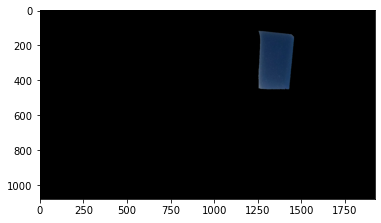

In [13]:
plt.imshow(deposit)
plt.show()

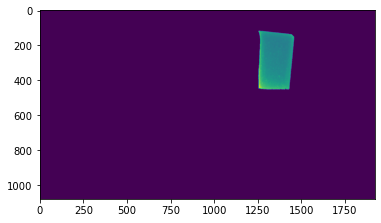

In [12]:
img_gray = cv2.cvtColor(deposit, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
plt.show()

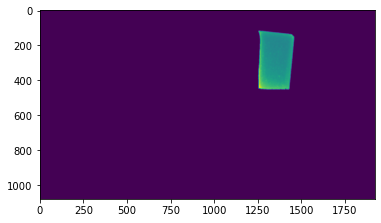

In [14]:
dst = cv2.GaussianBlur(img_gray,(5,5),cv2.BORDER_DEFAULT)
plt.imshow(dst)
plt.show()

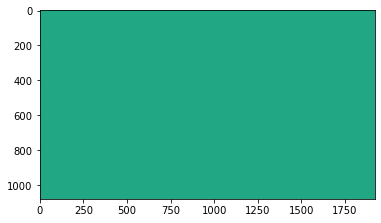

In [15]:
laplacian = cv2.Laplacian(img_gray,cv2.CV_64F)
plt.imshow(laplacian)
plt.show()